<a href="https://colab.research.google.com/github/Nerd-A/GoogleStockPrediction/blob/main/GoogleStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline 

In [ ]:
data_set_train = pd.read_csv("https://raw.githubusercontent.com/Parasgr7/Google-Stock-Price-Prediction/master/Google_Stock_Price_Train.csv")

In [ ]:
print(data_set_train)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]


In [ ]:
data_set_test = pd.read_csv("https://raw.githubusercontent.com/Parasgr7/Google-Stock-Price-Prediction/master/Google_Stock_Price_Test.csv")
actual_stock_price = data_set_test.iloc[:,1:2].values

In [ ]:
training_set = data_set_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(training_set)
scaled_data

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(scaled_data[i-60:i,0])
  y_train.append(scaled_data[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)


In [ ]:
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [ ]:
print(x_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [ ]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense 
from keras.layers import Dropout

In [ ]:
reg = Sequential()
reg.add(LSTM(units = 50,return_sequences= True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50,return_sequences= True))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50,return_sequences= True))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))





In [ ]:
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 12s 125ms/step - loss: 0.0011
Epoch 2/100
38/38 [==============================] - 5s 126ms/step - loss: 8.2807e-04
Epoch 3/100
38/38 [==============================] - 5s 127ms/step - loss: 9.7359e-04
Epoch 4/100
38/38 [==============================] - 5s 125ms/step - loss: 9.6137e-04
Epoch 5/100
38/38 [==============================] - 5s 125ms/step - loss: 8.4182e-04
Epoch 6/100
38/38 [==============================] - 5s 125ms/step - loss: 9.0263e-04
Epoch 7/100
38/38 [==============================] - 5s 125ms/step - loss: 8.6191e-04
Epoch 8/100
38/38 [==============================] - 5s 124ms/step - loss: 8.9570e-04
Epoch 9/100
38/38 [==============================] - 5s 126ms/step - loss: 9.2603e-04
Epoch 10/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0010
Epoch 11/100
38/38 [==============================] - 5s 126ms/step - loss: 8.9639e-04
Epoch 12/100
38/38 [==============================] - 5s 12

In [ ]:
actual_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
dataset=pd.concat((data_set_train['Open'],data_set_test['Open']),axis=0)

input = dataset[len(dataset)-len(data_set_test)-60:].values
input = input.reshape(-1,1)
input = scaler.transform(input)
x_test=[]
for i in range(60,80):
  x_test.append(input[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))








In [ ]:
predicted_stock_price = reg.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

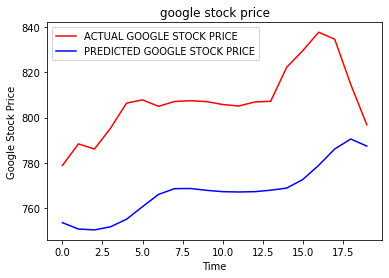

In [ ]:
plot.plot(actual_stock_price,color='red',label='ACTUAL GOOGLE STOCK PRICE')
plot.plot(predicted_stock_price,color='blue',label='PREDICTED GOOGLE STOCK PRICE')
plot.title('google stock price')
plot.xlabel('Time')
plot.ylabel('Google Stock Price')
plot.legend()